In [24]:
import pandas as pd
import numpy as np
from typing import Dict, List
import math
from datetime import datetime, timezone
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [25]:
def parse_timestamp_to_utc(timestamp):
    """밀리초 단위 유닉스 타임스탬프를 UTC datetime으로 변환"""
    try:
        # 밀리초를 초로 변환
        ts_seconds = float(timestamp) / 1000
        return datetime.fromtimestamp(ts_seconds, tz=timezone.utc)
    except (ValueError, TypeError):
        raise ValueError(f"Invalid timestamp format: {timestamp}")

In [26]:
data = pd.read_csv(r"C:\Dev\TMBearing\testdata.csv")  

# UTC 시간 및 초 단위 컬럼 추가
data['time'] = data['timestamp'].apply(parse_timestamp_to_utc)
data['second'] = (data['timestamp'].apply(float) / 1000).astype(int)  # 초 단위로 내림

In [27]:
data

,magic,deviceID,commandId,timestamp,ch1,ch2,ch3,time,second
0,aaaa,2732,10,1734381207178,-0.001391,-0.002563,-1.025016,2024-12-16 20:33:27.178000+00:00,1734381207
1,aaaa,2732,10,1734381207179,-0.001406,-0.002703,-1.025359,2024-12-16 20:33:27.179000+00:00,1734381207
2,aaaa,2732,10,1734381207180,-0.001172,-0.003031,-1.025375,2024-12-16 20:33:27.180000+00:00,1734381207
3,aaaa,2732,10,1734381207181,-0.001156,-0.003172,-1.025375,2024-12-16 20:33:27.181000+00:00,1734381207
4,aaaa,2732,10,1734381207182,-0.001203,-0.003016,-1.026000,2024-12-16 20:33:27.182000+00:00,1734381207
...,...,...,...,...,...,...,...,...,...
44578375,aaaa,2732,10,1734427292363,-0.000750,-0.002406,-1.027016,2024-12-17 09:21:32.363000+00:00,1734427292
44578376,aaaa,2732,10,1734427292364,-0.000797,-0.002422,-1.025516,2024-12-17 09:21:32.364000+00:00,1734427292
44578377,aaaa,2732,10,1734427292365,-0.000094,-0.002797,-1.025938,2024-12-17 09:21:32.365000+00:00,1734427292
44578378,aaaa,2732,10,1734427292366,-0.000266,-0.002688,-1.026109,2024-12-17 09:21:32.366000+00:00,1734427292


In [28]:
# second 열의 고유 값별 개수 계산
second_counts = data['second'].value_counts()
second_counts

second
1734383789    1001
1734393588    1001
1734392826    1001
1734384799    1001
1734395515    1001
              ... 
1734394357     115
1734424814      78
1734424651      53
1734381263      37
1734424260       7
Name: count, Length: 44592, dtype: int64

In [31]:
# second 값별 개수 계산
second_counts = data['second'].value_counts()

# second 값이 1001개인 데이터만 필터링
valid_seconds = second_counts[second_counts == 1001].index
filtered_df = data[data['second'].isin(valid_seconds)]

# 1001개 미만인 데이터 삭제
cleaned_df = filtered_df

In [32]:
cleaned_df['second'].value_counts()

second
1734427250    1001
1734381250    1001
1734381694    1001
1734381754    1001
1734381815    1001
              ... 
1734382176    1001
1734382116    1001
1734382056    1001
1734381995    1001
1734381935    1001
Name: count, Length: 773, dtype: int64

In [33]:
cleaned_df

,magic,deviceID,commandId,timestamp,ch1,ch2,ch3,time,second
34212,aaaa,2732,10,1734381250000,0.000750,-0.005047,-1.022563,2024-12-16 20:34:10+00:00,1734381250
34213,aaaa,2732,10,1734381250001,-0.002547,-0.000281,-1.013969,2024-12-16 20:34:10.001000+00:00,1734381250
34214,aaaa,2732,10,1734381250002,-0.000813,-0.004906,-1.024906,2024-12-16 20:34:10.002000+00:00,1734381250
34215,aaaa,2732,10,1734381250003,0.001422,-0.002375,-1.028922,2024-12-16 20:34:10.003000+00:00,1734381250
34216,aaaa,2732,10,1734381250004,-0.001125,-0.004859,-1.027500,2024-12-16 20:34:10.004000+00:00,1734381250
...,...,...,...,...,...,...,...,...,...
44537007,aaaa,2732,10,1734427250995,-0.001141,-0.004859,-1.019688,2024-12-17 09:20:50.995000+00:00,1734427250
44537008,aaaa,2732,10,1734427250996,-0.001422,-0.003156,-1.028266,2024-12-17 09:20:50.996000+00:00,1734427250
44537009,aaaa,2732,10,1734427250997,-0.000984,0.000266,-1.026062,2024-12-17 09:20:50.997000+00:00,1734427250
44537010,aaaa,2732,10,1734427250998,-0.001672,-0.005937,-1.027094,2024-12-17 09:20:50.998000+00:00,1734427250


In [34]:
# Time feature 생성
def rms(x): return np.sqrt(np.mean(np.square(x)))
def ptp(x): return np.ptp(x)
def sra(x): return np.square(np.mean(np.sqrt(np.abs(x))))
def aa(x):  return np.mean(np.abs(x))
def var(x): return np.var(x)
def skewness(x): return skew(x, bias=False)
def kurt(x): return kurtosis(x, bias=False)
def crest_factor(x): return np.max(np.abs(x)) / rms(x)
def shape_factor(x): return rms(x) / aa(x)
def impulse_factor(x): return np.max(np.abs(x)) / aa(x)
def coefficient_of_variation(x): return np.max(np.abs(x)) / sra(x)
def coefficient_of_skewness(x): return skewness(x) / var(x)**3
def coefficient_of_kurtosis(x): return kurt(x) / var(x)**4

In [35]:
statistics_functions = {
    'mean': 'mean',
    'rms': rms,
    'sra': sra,
    'aa': aa,
    'max': 'max',
    'min': 'min',
    'ptp': ptp,
    'var': var,
    'skewness': skewness,
    'kurtosis': kurt,
    'crest': crest_factor,
    'shape': shape_factor,
    'impulse': impulse_factor,
    'coefficient_of_variation': coefficient_of_variation,
    'coefficient_of_skewness': coefficient_of_skewness,
    'coefficient_of_kurtosis': coefficient_of_kurtosis
}

In [56]:
# 메인 함수: 채널별 딕셔너리 형태로 반환
def compute_channel_stats_by_dict(df, channels=['ch1', 'ch2', 'ch3'], group_col='second'):
    grouped = df.groupby(group_col)
    results = {}

    for ch in channels:
        stats_df = grouped[ch].agg(list(statistics_functions.values())).reset_index()
        stats_df.columns = [group_col] + list(statistics_functions.keys())
        results[ch] = stats_df

    # 베어링 파라미터 
    RPM = 1800  # 회전 속도 (RPM)
    N = 8       # 볼 수
    PD = 0.05   # 피치 직경 (m)
    BD = 0.01   # 볼 직경 (m)
    phi = np.radians(0)  # 접촉 각도 (라디안)

    # 결함 주파수 계산
    BPFO = (N * RPM / 2) * (1 - (BD / PD) * np.cos(phi)) / 60
    BPFI = (N * RPM / 2) * (1 + (BD / PD) * np.cos(phi)) / 60
    BSF = (PD / BD) * (RPM / 60) * np.sqrt(1 - (BD / PD * np.cos(phi)) ** 2)
    FTF = (RPM / 2) * (1 - (BD / PD) * np.cos(phi)) / 60

    # 결함 주파수 값 추가
    for ch in channels:
        results[ch]['BPFO_Freq'] = BPFO
        results[ch]['BPFI_Freq'] = BPFI
        results[ch]['BSF_Freq'] = BSF
        results[ch]['FTF_Freq'] = FTF

    # 결함 주파수 신호 추출 및 통계 계산 함수
    def extract_defect_stats(signal, sampling_rate, target_freq, bandwidth=1.0):
        n = len(signal)
        fft_data = np.fft.fft(signal)
        fft_freq = np.fft.fftfreq(n, 1/sampling_rate)
        magnitude_spectrum = np.abs(fft_data)
        positive_freq = fft_freq[:n//2]
        positive_magnitude = magnitude_spectrum[:n//2]
        
        mask = (positive_freq >= target_freq - bandwidth) & (positive_freq <= target_freq + bandwidth)
        if np.any(mask):
            filtered_mag = positive_magnitude[mask]
            idx = np.argmax(filtered_mag)
            fft_filtered = np.zeros(n, dtype=complex)
            fft_filtered[:n//2] = fft_data[:n//2]
            fft_filtered[n//2:] = np.conj(fft_filtered[:0:-1])
            signal_filtered = np.fft.ifft(fft_filtered).real
            return np.mean(signal_filtered), np.max(signal_filtered)
        return np.nan, np.nan

    # 각 채널에 결함 주파수 통계 추가
    for ch in channels:
        signal = df[df[group_col] == df[group_col].iloc[0]][ch].values  # 첫 번째 second 그룹 사용
        sampling_rate = 1 / np.mean(np.diff(df['timestamp'].values / 1000))
        bpfo_mean, bpfo_max = extract_defect_stats(signal, sampling_rate, BPFO)
        bpfi_mean, bpfi_max = extract_defect_stats(signal, sampling_rate, BPFI)
        bsf_mean, bsf_max = extract_defect_stats(signal, sampling_rate, BSF)
        ftf_mean, ftf_max = extract_defect_stats(signal, sampling_rate, FTF)
        
        results[ch]['BPFO_Mean'] = bpfo_mean
        results[ch]['BPFO_Max'] = bpfo_max
        results[ch]['BPFI_Mean'] = bpfi_mean
        results[ch]['BPFI_Max'] = bpfi_max
        results[ch]['BSF_Mean'] = bsf_mean
        results[ch]['BSF_Max'] = bsf_max
        results[ch]['FTF_Mean'] = ftf_mean
        results[ch]['FTF_Max'] = ftf_max

    return results

In [57]:
results = compute_channel_stats_by_dict(cleaned_df)
print(results['ch1'].head())

       second      mean       rms       sra        aa       max       min  \
0  1734381250 -0.001174  0.001824  0.001271  0.001485  0.003312 -0.005625   
1  1734381694 -0.000525  0.001437  0.000943  0.001131  0.003984 -0.004734   
2  1734381754 -0.000565  0.001454  0.000972  0.001152  0.004094 -0.004875   
3  1734381815 -0.000486  0.001461  0.000996  0.001171  0.003672 -0.004938   
4  1734381875 -0.000486  0.001411  0.000982  0.001146  0.003594 -0.004531   

        ptp       var  skewness  ...    BSF_Freq  FTF_Freq  BPFO_Mean  \
0  0.008938  0.000002 -0.002315  ...  146.969385      12.0        NaN   
1  0.008719  0.000002 -0.018161  ...  146.969385      12.0        NaN   
2  0.008969  0.000002 -0.069134  ...  146.969385      12.0        NaN   
3  0.008609  0.000002 -0.043016  ...  146.969385      12.0        NaN   
4  0.008125  0.000002  0.070992  ...  146.969385      12.0        NaN   

   BPFO_Max  BPFI_Mean  BPFI_Max  BSF_Mean  BSF_Max  FTF_Mean  FTF_Max  
0       NaN        NaN   

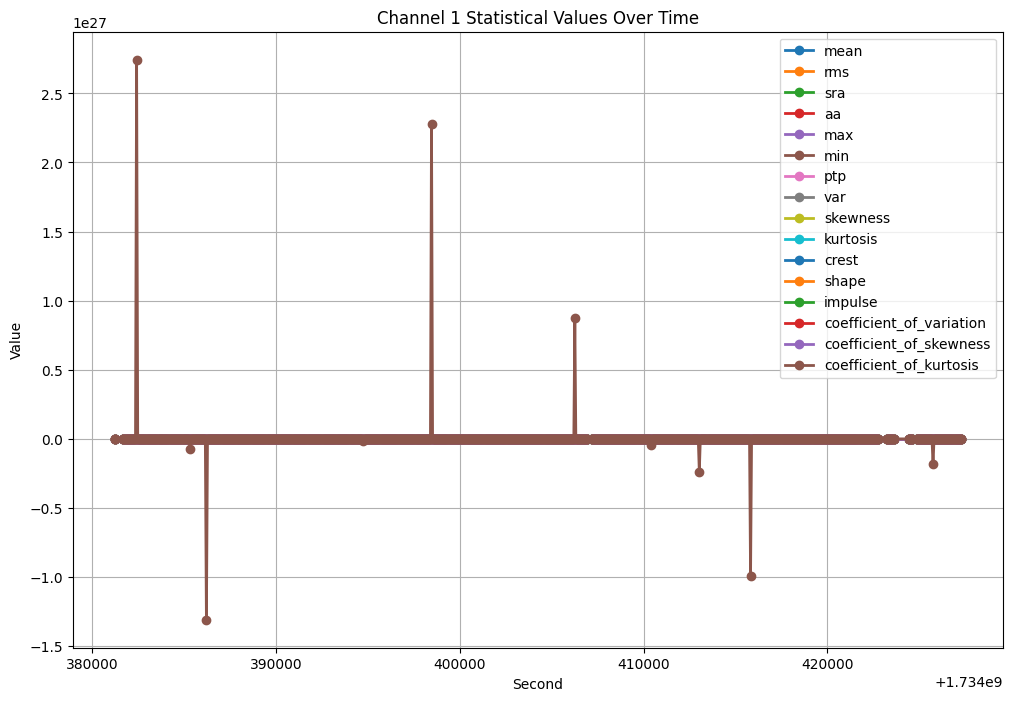

In [23]:
# 그래프 생성
plt.figure(figsize=(12, 8))

# 딕셔너리에서 데이터 추출 및 플롯
for key in results['ch1']:
    if key != 'second':  # 'second'는 x축이므로 제외
        plt.plot(results['ch1']['second'], results['ch1'][key], label=key, marker='o', linewidth=2)

# 그래프 설정
plt.xlabel('Second')
plt.ylabel('Value')
plt.title('Channel 1 Statistical Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 주파수 변환
# timestamp를 초 단위로 변환 (ms를 s로)
time_seconds = data['timestamp'].values / 1000
time_diff = np.diff(time_seconds)
sampling_rate = 1.0 / np.mean(time_diff)  # 평균 시간 간격을 사용한 샘플링 레이트

In [10]:
# FFT 수행
ch1_data = data['ch1'].values
n = len(ch1_data)
fft_data = np.fft.fft(ch1_data)
fft_freq = np.fft.fftfreq(n, 1/sampling_rate)

In [11]:
# 크기 스펙트럼 계산
magnitude_spectrum = np.abs(fft_data)

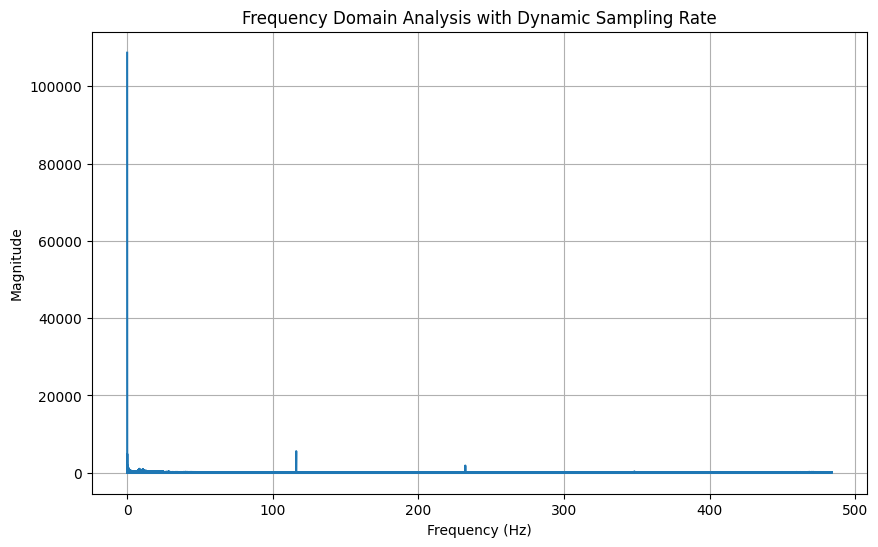

In [12]:
import matplotlib.pyplot as plt
# 플롯
plt.figure(figsize=(10, 6))
plt.plot(fft_freq[:n//2], magnitude_spectrum[:n//2])  # 양의 주파수만 표시
plt.title('Frequency Domain Analysis with Dynamic Sampling Rate')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()